# データ・サイエンティストへの道

KaggleやSIGNATEを用いた、より実践的にデータサイエンスの練習法を紹介します。


<div class="alert alert-warning">

鋭意執筆中

Kaggle を用いたコンペへの参加

</div>

<!--
https://www.codexa.net/kaggle-titanic-beginner/
-->

## Kaggle

Kaggleは、世界中の機械学習・データサイエンスに携わっている約40万人以上集まるコミニティーです。

Kaggleでは、企業や政府などの組織とデータ分析のプロであるデータサイエンティスト/機械学習エンジニアを繋げるプラットフォームとなっています。単純なマッチングではなく、Kaggleの最大の目玉とも言える「Competetion（コンペ）」がKaggleの特徴の一つです。

Competition（コンペ）は、企業や政府がコンペ形式（競争形式）で課題を提示し、賞金と引き換えに最も制度の高い分析モデルを買い取るという、最近でいう一種のクラウドファンディングに近いような仕組みとなります。


各コンペの利用規約へ同意をすると、データセットのダウロードが可能となります。データセットを落として、自分で処理を行い、最適な予測モデルを作って見ましょう！

予測モデルですが、各コンペの「 Evaluation 」のページにて「 Submission File 」（投稿ファイル）とう項目に形式や詳細がまとめられています。下記の例は現在進行中の「Mercari Price Suggestion Challenge」の評価詳細ページです。「 Submission File 」の項目に、「test_idとpriceの2列のヘッダーを含むCSV形式」で提出してくださいと指定があります。

https://www.codexa.net/what-is-kaggle/







## タイタニック号の生存者予測

有名なタイタニック号の問題に挑戦してみましょう。

[タイタニック号](https://www.kaggle.com/c/titanic/data) Kaggle 

Kaggleの利用にはアカウント登録(無料)が必要となります。
データサイエンスをさらに深めて勉強するためには、会員登録しておきましょう。

ふたつのファイルを入手します。

* `train.csv`
* `test.csv`

pandas を用いて、データの確認をしましょう。



In [20]:
import pandas as pd 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print('訓練データの大きさ', train.shape)
print('テストデータの大きさ', test.shape)
 

訓練データの大きさ (891, 12)
テストデータの大きさ (418, 11)


訓練データとテストデータを比較してみると、
test は418名の乗客情報で、 train は891名の乗客情報ですね。
カラム数が異なるのは、前述しましたが train には「Survived」のカラムがあるからです。
 

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 欠損値を調べる

実際のデータ分析では、100%データセットが揃っていることはほとんどありません。
どこかの属性が一部欠けていたり、信用性が低くて使えないことがあります。



In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId – 乗客識別ユニークID
Survived – 生存フラグ（0=死亡、1=生存）
Pclass – チケットクラス
Name – 乗客の名前
Sex – 性別（male=男性、female＝女性）
Age – 年齢
SibSp – タイタニックに同乗している兄弟/配偶者の数
parch – タイタニックに同乗している親/子供の数
ticket – チケット番号
fare – 料金
cabin – 客室番号
Embarked – 出港地（タイタニックへ乗った港）

pclass = チケットクラス

1 = 上層クラス（お金持ち）
2 = 中級クラス（一般階級）
3 = 下層クラス（労働階級）

Embarked = 各変数の定義は下記の通り
C = Cherbourg
Q = Queenstown
S = Southampton

訓練データを確認すると、`Age`と`Cabin`の属性が欠損しています。test の欠損データを表しています。思ったよりもしっかりとしたデータではありますが、特に「Age」と「Cabin」の2つの項目で欠損が多いですね。

欠損値をどのように処理するかということは大きな課題です。

In [23]:
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})

test["Fare"] = test["Fare"].fillna(train["Fare"].mean())


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [24]:
X_train = train[["Pclass", "Sex", "Fare"]]
y_train = train["Survived"]
X_test = test[["Pclass", "Sex", "Fare"]]



In [38]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

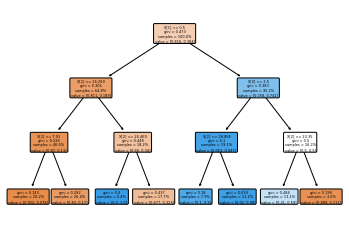

In [40]:
 import matplotlib.pyplot as plt
 
 plot_tree(model,filled=True, rounded=True, proportion=True)
 plt.show()

In [41]:
y_pred = model.predict(X_test)

In [42]:
model.score(X_train, y_train)

0.8148148148148148

In [44]:
import numpy as np
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(y_pred, PassengerId, columns = ["Survived"])
my_solution.to_csv("result.csv", index_label = ["PassengerId"])


<img src="https://www.codexa.net/wp-content/uploads/2017/11/submit-kaggle.png">


## 過学習を防ぐには

## コースワーク

どちらかにアカウント登録して、コンペに参加してみよう。

<div class="admonition tip">

**演習（Kaggle）**

Kaggle にアカウント登録し、
「タイタニック号の生存者」のコンペにチャレンジしてみよう。

</div>

<div class="admonition tip">

**演習（SIGNATE）**

SIGNATE社にアカウント登録し、
[お弁当屋さんの予測コンテスト](https://signate.jp/competitions/24)にチャレンジしてみよう。

</div>

